<a href="https://colab.research.google.com/github/Harsha194/Elevate_Labs_Tasks/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary Statistics
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Additional Statistics:
                   Mean    Median     

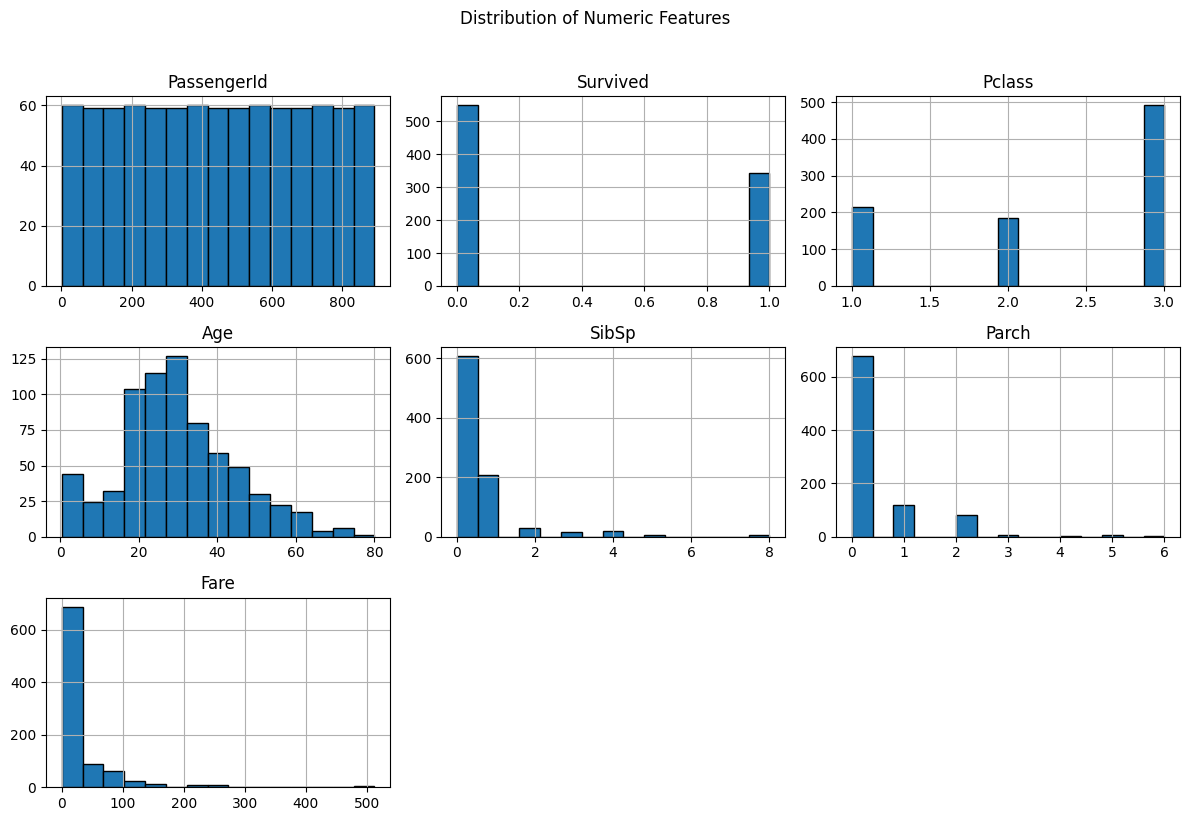


Boxplots of Numeric Features


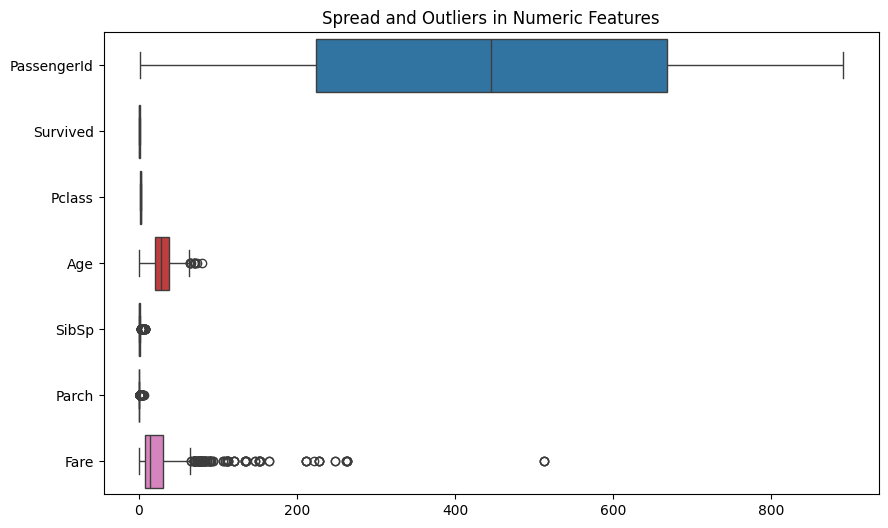


Pairplot of Numeric Features


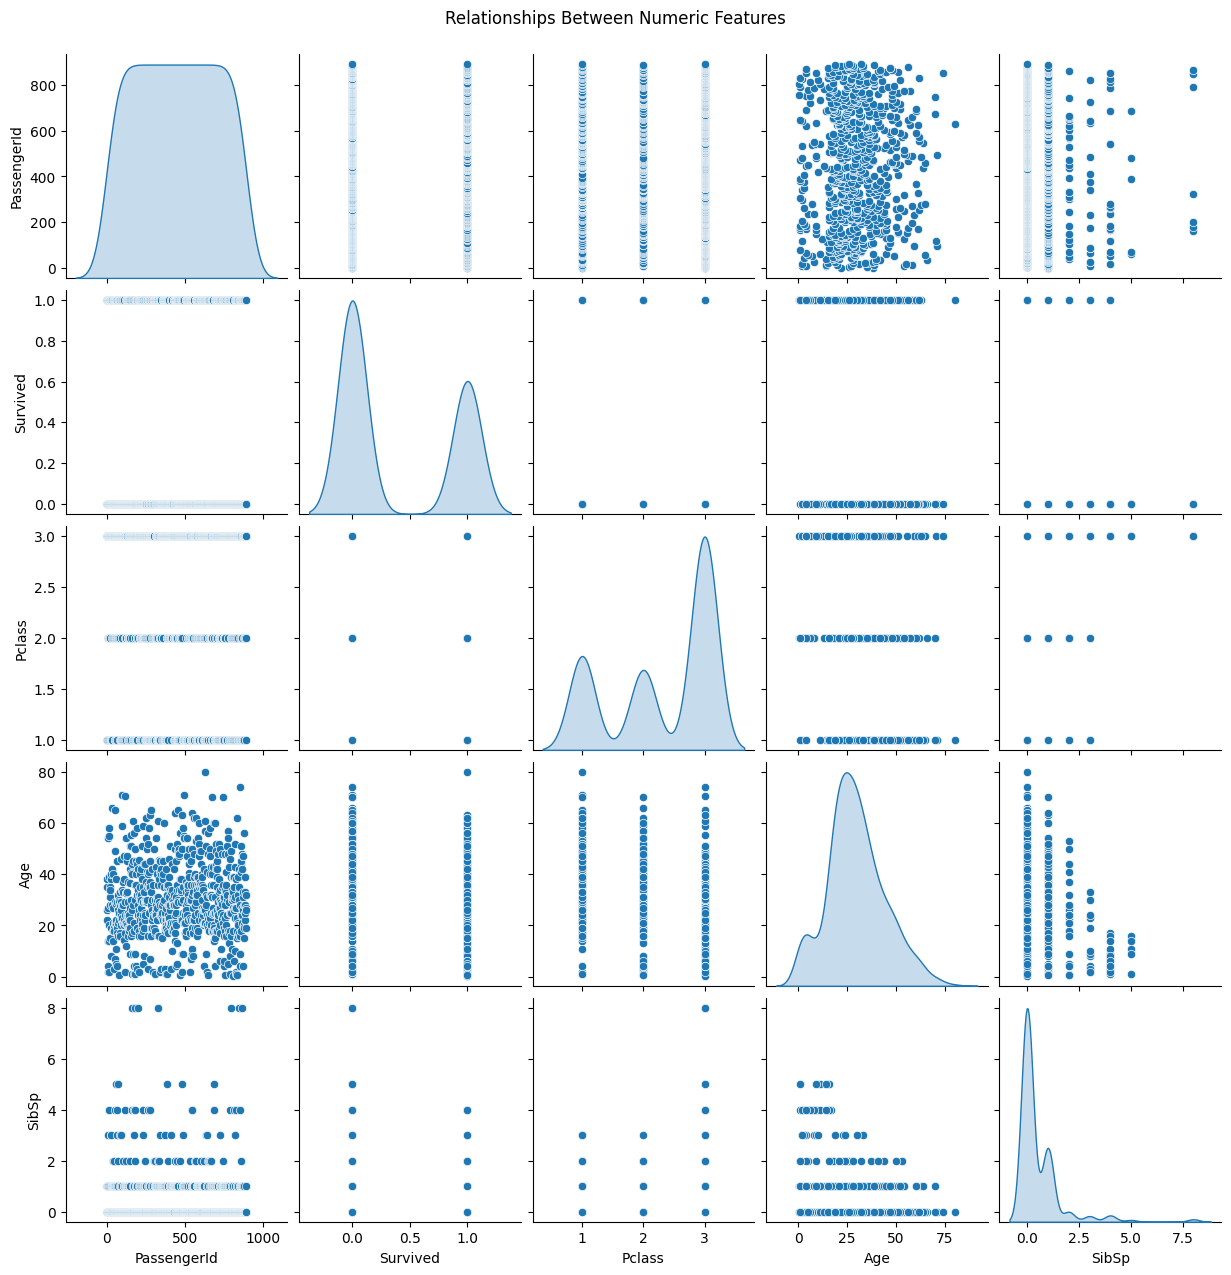


Correlation Matrix


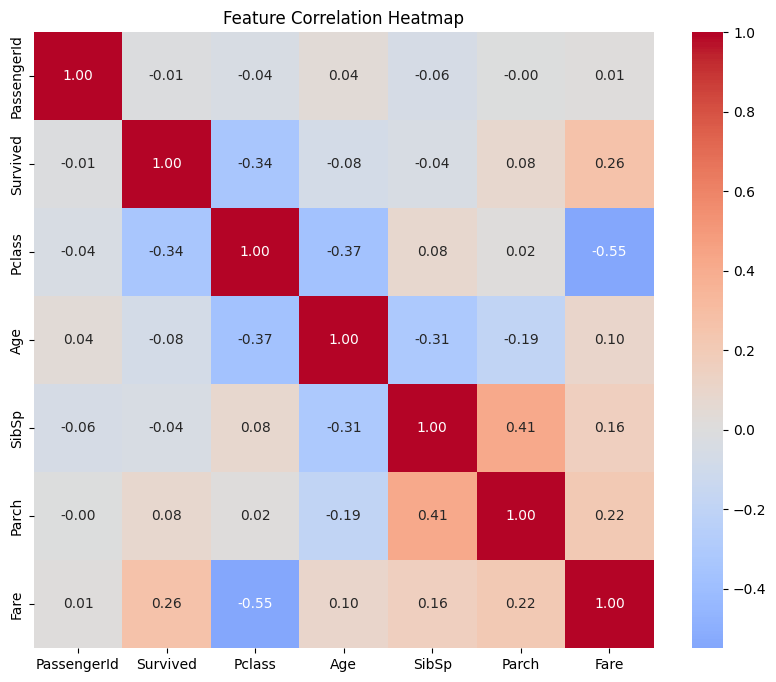


Potential Anomalies Detection

Potential outliers in Age:
- 11 outliers detected (1.2% of data)
- Range: [65.00, 80.00] vs normal range [-6.69, 64.81]

Potential outliers in SibSp:
- 46 outliers detected (5.2% of data)
- Range: [3.00, 8.00] vs normal range [-1.50, 2.50]

Potential outliers in Parch:
- 213 outliers detected (23.9% of data)
- Range: [1.00, 6.00] vs normal range [0.00, 0.00]

Potential outliers in Fare:
- 116 outliers detected (13.0% of data)
- Range: [66.60, 512.33] vs normal range [-26.72, 65.63]

Basic Feature Inferences
From the visualizations and statistics, we can observe:
- Features with right/left skew based on histogram shapes
- Features with potential outliers from boxplot whiskers
- Strong/weak correlations between features from correlation matrix
- Features with normal/uniform/bimodal distributions
- Features with large value ranges indicating need for scaling
- Features with many zeros or unexpected value clusters


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'data.csv' with your filename)
data = pd.read_csv('Titanic-Dataset.csv')

## 1. Generate summary statistics
print("="*50)
print("Summary Statistics")
print("="*50)
print(data.describe())  # Basic stats for numerical columns
print("\nAdditional Statistics:")
print(pd.DataFrame({
    'Mean': data.mean(numeric_only=True),
    'Median': data.median(numeric_only=True),
    'Std Dev': data.std(numeric_only=True),
    'Min': data.min(numeric_only=True),
    'Max': data.max(numeric_only=True),
    'Skewness': data.skew(numeric_only=True),
    'Kurtosis': data.kurtosis(numeric_only=True)
}))

## 2. Create histograms and boxplots for numeric features
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Histograms
print("\n" + "="*50)
print("Histograms of Numeric Features")
print("="*50)
data[numeric_cols].hist(bins=15, figsize=(12, 8), layout=(-1, 3), edgecolor='black')
plt.suptitle('Distribution of Numeric Features', y=1.02)
plt.tight_layout()
plt.show()

# Boxplots
print("\n" + "="*50)
print("Boxplots of Numeric Features")
print("="*50)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_cols], orient='h')
plt.title('Spread and Outliers in Numeric Features')
plt.show()

## 3. Use pairplot/correlation matrix for feature relationships
# Pairplot (for first 5 numeric columns to avoid clutter)
print("\n" + "="*50)
print("Pairplot of Numeric Features")
print("="*50)
if len(numeric_cols) > 1:
    sns.pairplot(data[numeric_cols[:5]], diag_kind='kde')
    plt.suptitle('Relationships Between Numeric Features', y=1.02)
    plt.show()

# Correlation matrix
print("\n" + "="*50)
print("Correlation Matrix")
print("="*50)
if len(numeric_cols) > 1:
    corr = data[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Feature Correlation Heatmap')
    plt.show()

## 4. Identify patterns, trends, or anomalies
print("\n" + "="*50)
print("Potential Anomalies Detection")
print("="*50)
for col in numeric_cols:
    # Using IQR method for outlier detection
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    if not outliers.empty:
        print(f"\nPotential outliers in {col}:")
        print(f"- {len(outliers)} outliers detected ({len(outliers)/len(data)*100:.1f}% of data)")
        print(f"- Range: [{outliers[col].min():.2f}, {outliers[col].max():.2f}] vs normal range [{lower_bound:.2f}, {upper_bound:.2f}]")

## 5. Basic feature-level inferences
print("\n" + "="*50)
print("Basic Feature Inferences")
print("="*50)
print("From the visualizations and statistics, we can observe:")
print("- Features with right/left skew based on histogram shapes")
print("- Features with potential outliers from boxplot whiskers")
print("- Strong/weak correlations between features from correlation matrix")
print("- Features with normal/uniform/bimodal distributions")
print("- Features with large value ranges indicating need for scaling")
print("- Features with many zeros or unexpected value clusters")